In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input|'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [2]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

In [3]:
train = pd.read_csv("/kaggle/input/tweet-sentiment-extraction/train.csv")
train.head()

,textID,text,selected_text,sentiment
0,a3d0a7d5ad,Spent the entire morning in a meeting w/ a ven...,my boss was not happy w/ them. Lots of fun.,neutral
1,251b6a6766,Oh! Good idea about putting them on ice cream,Good,positive
2,c9e8d1ef1c,says good (or should i say bad?) afternoon! h...,says good (or should i say bad?) afternoon!,neutral
3,f14f087215,i dont think you can vote anymore! i tried,i dont think you can vote anymore!,negative
4,bf7473b12d,haha better drunken tweeting you mean?,better,positive


In [4]:
corpus_raw = train["text"].str.lower().to_list()
corpus = []

for i in corpus_raw:
    corpus.append(str(i))

corpus = corpus[:1000]

In [5]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1
total_words

3265

In [6]:
input_sequence = []
for line in corpus:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequence.append(n_gram_sequence)
#         print(n_gram_sequence)

max_len_sequence = max([len(x) for x in input_sequence])
input_sequence = np.array(pad_sequences(input_sequence, maxlen=max_len_sequence, padding = 'pre'))

xs, labels = input_sequence[:, :-1], input_sequence[:, -1:]
ys = to_categorical(labels, num_classes=total_words)

In [7]:
import tensorflow as tf

In [11]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(total_words, 32, input_length=max_len_sequence-1),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(total_words, activation = 'softmax')
])

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['acc'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 31, 32)            104480    
_________________________________________________________________
bidirectional_2 (Bidirection (None, 31, 64)            16640     
_________________________________________________________________
bidirectional_3 (Bidirection (None, 64)                24832     
_________________________________________________________________
dense_1 (Dense)              (None, 3265)              212225    
Total params: 358,177
Trainable params: 358,177
Non-trainable params: 0
_________________________________________________________________


In [12]:
history = model.fit(xs, ys, epochs = 2000, verbose = 1, batch_size=512)

Train on 12225 samples
Epoch 1/2000
12225/12225 [==============================] - 5s 427us/sample - loss: 7.9438 - acc: 0.0225
Epoch 2/2000
12225/12225 [==============================] - 1s 44us/sample - loss: 7.0465 - acc: 0.0318
Epoch 3/2000
12225/12225 [==============================] - 1s 44us/sample - loss: 6.6668 - acc: 0.0318
Epoch 4/2000
12225/12225 [==============================] - 1s 44us/sample - loss: 6.6447 - acc: 0.0318
Epoch 5/2000
12225/12225 [==============================] - 1s 50us/sample - loss: 6.6381 - acc: 0.0299
Epoch 6/2000
12225/12225 [==============================] - 1s 48us/sample - loss: 6.6363 - acc: 0.0299
Epoch 7/2000
12225/12225 [==============================] - 1s 44us/sample - loss: 6.6328 - acc: 0.0318
Epoch 8/2000
12225/12225 [==============================] - 1s 45us/sample - loss: 6.6269 - acc: 0.0318
Epoch 9/2000
12225/12225 [==============================] - 1s 45us/sample - loss: 6.6122 - acc: 0.0318
Epoch 10/2000
12225/12225 [=============

12225/12225 [==============================] - 1s 42us/sample - loss: 5.4984 - acc: 0.0799
Epoch 79/2000
12225/12225 [==============================] - 1s 43us/sample - loss: 5.4867 - acc: 0.0792
Epoch 80/2000
12225/12225 [==============================] - 1s 44us/sample - loss: 5.4780 - acc: 0.0789
Epoch 81/2000
12225/12225 [==============================] - 1s 47us/sample - loss: 5.4657 - acc: 0.0791
Epoch 82/2000
12225/12225 [==============================] - 1s 44us/sample - loss: 5.4564 - acc: 0.0820
Epoch 83/2000
12225/12225 [==============================] - 1s 46us/sample - loss: 5.4499 - acc: 0.0808
Epoch 84/2000
12225/12225 [==============================] - 1s 44us/sample - loss: 5.4386 - acc: 0.0810
Epoch 85/2000
12225/12225 [==============================] - 1s 44us/sample - loss: 5.4304 - acc: 0.0811
Epoch 86/2000
12225/12225 [==============================] - 1s 46us/sample - loss: 5.4203 - acc: 0.0812
Epoch 87/2000
12225/12225 [==============================] - 1s 46us/

12225/12225 [==============================] - 1s 53us/sample - loss: 4.7381 - acc: 0.1236
Epoch 156/2000
12225/12225 [==============================] - 1s 45us/sample - loss: 4.7310 - acc: 0.1268
Epoch 157/2000
12225/12225 [==============================] - 1s 45us/sample - loss: 4.7213 - acc: 0.1261
Epoch 158/2000
12225/12225 [==============================] - 1s 44us/sample - loss: 4.7196 - acc: 0.1260
Epoch 159/2000
12225/12225 [==============================] - 1s 44us/sample - loss: 4.7128 - acc: 0.1264
Epoch 160/2000
12225/12225 [==============================] - 1s 43us/sample - loss: 4.7025 - acc: 0.1273
Epoch 161/2000
12225/12225 [==============================] - 1s 47us/sample - loss: 4.6953 - acc: 0.1282
Epoch 162/2000
12225/12225 [==============================] - 1s 66us/sample - loss: 4.6857 - acc: 0.1278
Epoch 163/2000
12225/12225 [==============================] - 1s 49us/sample - loss: 4.6789 - acc: 0.1274
Epoch 164/2000
12225/12225 [==============================] -

12225/12225 [==============================] - 1s 45us/sample - loss: 4.0801 - acc: 0.1958
Epoch 233/2000
12225/12225 [==============================] - 1s 51us/sample - loss: 4.0710 - acc: 0.1984
Epoch 234/2000
12225/12225 [==============================] - 1s 47us/sample - loss: 4.0603 - acc: 0.1974
Epoch 235/2000
12225/12225 [==============================] - 1s 46us/sample - loss: 4.0536 - acc: 0.2011
Epoch 236/2000
12225/12225 [==============================] - 1s 43us/sample - loss: 4.0465 - acc: 0.1978
Epoch 237/2000
12225/12225 [==============================] - 1s 44us/sample - loss: 4.0356 - acc: 0.2034
Epoch 238/2000
12225/12225 [==============================] - 1s 43us/sample - loss: 4.0461 - acc: 0.2007
Epoch 239/2000
12225/12225 [==============================] - 1s 45us/sample - loss: 4.0312 - acc: 0.2021
Epoch 240/2000
12225/12225 [==============================] - 1s 44us/sample - loss: 4.0172 - acc: 0.2038
Epoch 241/2000
12225/12225 [==============================] -

12225/12225 [==============================] - 1s 45us/sample - loss: 3.3957 - acc: 0.2959
Epoch 310/2000
12225/12225 [==============================] - 1s 45us/sample - loss: 3.3790 - acc: 0.2957
Epoch 311/2000
12225/12225 [==============================] - 1s 44us/sample - loss: 3.3810 - acc: 0.2970
Epoch 312/2000
12225/12225 [==============================] - 1s 51us/sample - loss: 3.3648 - acc: 0.2988
Epoch 313/2000
12225/12225 [==============================] - 1s 44us/sample - loss: 3.3633 - acc: 0.2982
Epoch 314/2000
12225/12225 [==============================] - 1s 44us/sample - loss: 3.3513 - acc: 0.3029
Epoch 315/2000
12225/12225 [==============================] - 1s 45us/sample - loss: 3.3339 - acc: 0.3046
Epoch 316/2000
12225/12225 [==============================] - 1s 43us/sample - loss: 3.3215 - acc: 0.3093
Epoch 317/2000
12225/12225 [==============================] - 1s 43us/sample - loss: 3.3153 - acc: 0.3074
Epoch 318/2000
12225/12225 [==============================] -

12225/12225 [==============================] - 1s 43us/sample - loss: 2.8892 - acc: 0.3855
Epoch 387/2000
12225/12225 [==============================] - 1s 45us/sample - loss: 2.8414 - acc: 0.3954
Epoch 388/2000
12225/12225 [==============================] - 1s 47us/sample - loss: 2.8313 - acc: 0.3974
Epoch 389/2000
12225/12225 [==============================] - 1s 46us/sample - loss: 2.8199 - acc: 0.3974
Epoch 390/2000
12225/12225 [==============================] - 1s 58us/sample - loss: 2.8099 - acc: 0.4032
Epoch 391/2000
12225/12225 [==============================] - 1s 44us/sample - loss: 2.8066 - acc: 0.4011
Epoch 392/2000
12225/12225 [==============================] - 1s 48us/sample - loss: 2.7982 - acc: 0.4019
Epoch 393/2000
12225/12225 [==============================] - 1s 44us/sample - loss: 2.7995 - acc: 0.4059
Epoch 394/2000
12225/12225 [==============================] - 1s 44us/sample - loss: 2.7972 - acc: 0.4044
Epoch 395/2000
12225/12225 [==============================] -

12225/12225 [==============================] - 1s 44us/sample - loss: 2.4317 - acc: 0.4797
Epoch 464/2000
12225/12225 [==============================] - 1s 45us/sample - loss: 2.4274 - acc: 0.4815
Epoch 465/2000
12225/12225 [==============================] - 1s 43us/sample - loss: 2.4152 - acc: 0.4835
Epoch 466/2000
12225/12225 [==============================] - 1s 43us/sample - loss: 2.4088 - acc: 0.4870
Epoch 467/2000
12225/12225 [==============================] - 1s 41us/sample - loss: 2.4289 - acc: 0.4800
Epoch 468/2000
12225/12225 [==============================] - 1s 45us/sample - loss: 2.4005 - acc: 0.4864
Epoch 469/2000
12225/12225 [==============================] - 1s 51us/sample - loss: 2.3794 - acc: 0.4930
Epoch 470/2000
12225/12225 [==============================] - 1s 45us/sample - loss: 2.3706 - acc: 0.4931
Epoch 471/2000
12225/12225 [==============================] - 1s 45us/sample - loss: 2.3719 - acc: 0.4927
Epoch 472/2000
12225/12225 [==============================] -

12225/12225 [==============================] - 1s 43us/sample - loss: 2.0771 - acc: 0.5522
Epoch 541/2000
12225/12225 [==============================] - 1s 43us/sample - loss: 2.0795 - acc: 0.5538
Epoch 542/2000
12225/12225 [==============================] - 1s 43us/sample - loss: 2.0712 - acc: 0.5553
Epoch 543/2000
12225/12225 [==============================] - 1s 44us/sample - loss: 2.1529 - acc: 0.5345
Epoch 544/2000
12225/12225 [==============================] - 1s 45us/sample - loss: 2.2513 - acc: 0.5139
Epoch 545/2000
12225/12225 [==============================] - 1s 42us/sample - loss: 2.1923 - acc: 0.5259
Epoch 546/2000
12225/12225 [==============================] - 1s 44us/sample - loss: 2.1426 - acc: 0.5371
Epoch 547/2000
12225/12225 [==============================] - 1s 44us/sample - loss: 2.1097 - acc: 0.5462
Epoch 548/2000
12225/12225 [==============================] - 1s 54us/sample - loss: 2.0855 - acc: 0.5509
Epoch 549/2000
12225/12225 [==============================] -

12225/12225 [==============================] - 1s 43us/sample - loss: 1.9158 - acc: 0.5846
Epoch 618/2000
12225/12225 [==============================] - 1s 48us/sample - loss: 1.8898 - acc: 0.5912
Epoch 619/2000
12225/12225 [==============================] - 1s 45us/sample - loss: 1.8550 - acc: 0.6012
Epoch 620/2000
12225/12225 [==============================] - 1s 44us/sample - loss: 1.8353 - acc: 0.6092
Epoch 621/2000
12225/12225 [==============================] - 1s 46us/sample - loss: 1.8199 - acc: 0.6105
Epoch 622/2000
12225/12225 [==============================] - 1s 42us/sample - loss: 1.8014 - acc: 0.6144
Epoch 623/2000
12225/12225 [==============================] - 1s 45us/sample - loss: 1.8022 - acc: 0.6133
Epoch 624/2000
12225/12225 [==============================] - 1s 47us/sample - loss: 1.7975 - acc: 0.6144
Epoch 625/2000
12225/12225 [==============================] - 1s 49us/sample - loss: 1.7852 - acc: 0.6190
Epoch 626/2000
12225/12225 [==============================] -

12225/12225 [==============================] - 1s 43us/sample - loss: 1.6505 - acc: 0.6407
Epoch 695/2000
12225/12225 [==============================] - 1s 42us/sample - loss: 1.6646 - acc: 0.6366
Epoch 696/2000
12225/12225 [==============================] - 1s 43us/sample - loss: 1.6536 - acc: 0.6375
Epoch 697/2000
12225/12225 [==============================] - 1s 44us/sample - loss: 1.6185 - acc: 0.6474
Epoch 698/2000
12225/12225 [==============================] - 1s 45us/sample - loss: 1.6013 - acc: 0.6505
Epoch 699/2000
12225/12225 [==============================] - 1s 61us/sample - loss: 1.5871 - acc: 0.6533
Epoch 700/2000
12225/12225 [==============================] - 1s 53us/sample - loss: 1.5790 - acc: 0.6587
Epoch 701/2000
12225/12225 [==============================] - 1s 45us/sample - loss: 1.5798 - acc: 0.6588
Epoch 702/2000
12225/12225 [==============================] - 1s 44us/sample - loss: 1.5746 - acc: 0.6587
Epoch 703/2000
12225/12225 [==============================] -

12225/12225 [==============================] - 1s 43us/sample - loss: 1.4222 - acc: 0.6941
Epoch 772/2000
12225/12225 [==============================] - 1s 43us/sample - loss: 1.4098 - acc: 0.6943
Epoch 773/2000
12225/12225 [==============================] - 1s 44us/sample - loss: 1.3932 - acc: 0.7021
Epoch 774/2000
12225/12225 [==============================] - 1s 43us/sample - loss: 1.3797 - acc: 0.7039
Epoch 775/2000
12225/12225 [==============================] - 1s 43us/sample - loss: 1.3705 - acc: 0.7089
Epoch 776/2000
12225/12225 [==============================] - 1s 47us/sample - loss: 1.3748 - acc: 0.7045
Epoch 777/2000
12225/12225 [==============================] - 1s 44us/sample - loss: 1.3537 - acc: 0.7112
Epoch 778/2000
12225/12225 [==============================] - 1s 44us/sample - loss: 1.3492 - acc: 0.7122
Epoch 779/2000
12225/12225 [==============================] - 1s 45us/sample - loss: 1.3433 - acc: 0.7132
Epoch 780/2000
12225/12225 [==============================] -

12225/12225 [==============================] - 1s 44us/sample - loss: 1.3944 - acc: 0.6933
Epoch 849/2000
12225/12225 [==============================] - 1s 44us/sample - loss: 1.3404 - acc: 0.7089
Epoch 850/2000
12225/12225 [==============================] - 1s 42us/sample - loss: 1.3082 - acc: 0.7193
Epoch 851/2000
12225/12225 [==============================] - 1s 46us/sample - loss: 1.2815 - acc: 0.7252
Epoch 852/2000
12225/12225 [==============================] - 1s 45us/sample - loss: 1.2950 - acc: 0.7187
Epoch 853/2000
12225/12225 [==============================] - 1s 55us/sample - loss: 1.3449 - acc: 0.7066
Epoch 854/2000
12225/12225 [==============================] - 1s 45us/sample - loss: 1.3178 - acc: 0.7148
Epoch 855/2000
12225/12225 [==============================] - 1s 44us/sample - loss: 1.2832 - acc: 0.7205
Epoch 856/2000
12225/12225 [==============================] - 1s 45us/sample - loss: 1.2493 - acc: 0.7315
Epoch 857/2000
12225/12225 [==============================] -

12225/12225 [==============================] - 1s 47us/sample - loss: 1.0622 - acc: 0.7746
Epoch 926/2000
12225/12225 [==============================] - 1s 50us/sample - loss: 1.0598 - acc: 0.7749
Epoch 927/2000
12225/12225 [==============================] - 1s 47us/sample - loss: 1.0802 - acc: 0.7699
Epoch 928/2000
12225/12225 [==============================] - 1s 43us/sample - loss: 1.0861 - acc: 0.7698
Epoch 929/2000
12225/12225 [==============================] - 1s 46us/sample - loss: 1.0997 - acc: 0.7624
Epoch 930/2000
12225/12225 [==============================] - 1s 47us/sample - loss: 1.1282 - acc: 0.7547
Epoch 931/2000
12225/12225 [==============================] - 1s 45us/sample - loss: 1.1047 - acc: 0.7616
Epoch 932/2000
12225/12225 [==============================] - 1s 45us/sample - loss: 1.1179 - acc: 0.7576
Epoch 933/2000
12225/12225 [==============================] - 1s 48us/sample - loss: 1.1535 - acc: 0.7474
Epoch 934/2000
12225/12225 [==============================] -

12225/12225 [==============================] - 1s 45us/sample - loss: 1.0271 - acc: 0.7774
Epoch 1003/2000
12225/12225 [==============================] - 1s 45us/sample - loss: 1.0180 - acc: 0.7773
Epoch 1004/2000
12225/12225 [==============================] - 1s 44us/sample - loss: 1.0101 - acc: 0.7826
Epoch 1005/2000
12225/12225 [==============================] - 1s 43us/sample - loss: 1.0088 - acc: 0.7818
Epoch 1006/2000
12225/12225 [==============================] - 1s 44us/sample - loss: 1.0297 - acc: 0.7753
Epoch 1007/2000
12225/12225 [==============================] - 1s 44us/sample - loss: 1.0054 - acc: 0.7854
Epoch 1008/2000
12225/12225 [==============================] - 1s 43us/sample - loss: 1.0064 - acc: 0.7827
Epoch 1009/2000
12225/12225 [==============================] - 1s 43us/sample - loss: 1.0336 - acc: 0.7755
Epoch 1010/2000
12225/12225 [==============================] - 1s 46us/sample - loss: 1.0310 - acc: 0.7773
Epoch 1011/2000
12225/12225 [========================

12225/12225 [==============================] - 1s 46us/sample - loss: 1.5635 - acc: 0.6510
Epoch 1079/2000
12225/12225 [==============================] - 1s 52us/sample - loss: 1.3101 - acc: 0.7025
Epoch 1080/2000
12225/12225 [==============================] - 1s 46us/sample - loss: 1.1679 - acc: 0.7424
Epoch 1081/2000
12225/12225 [==============================] - 1s 52us/sample - loss: 1.0825 - acc: 0.7598
Epoch 1082/2000
12225/12225 [==============================] - 1s 49us/sample - loss: 1.0335 - acc: 0.7711
Epoch 1083/2000
12225/12225 [==============================] - 1s 44us/sample - loss: 1.0248 - acc: 0.7759
Epoch 1084/2000
12225/12225 [==============================] - 1s 44us/sample - loss: 0.9979 - acc: 0.7816
Epoch 1085/2000
12225/12225 [==============================] - 1s 45us/sample - loss: 1.0211 - acc: 0.7759
Epoch 1086/2000
12225/12225 [==============================] - 1s 43us/sample - loss: 0.9629 - acc: 0.7900
Epoch 1087/2000
12225/12225 [========================

12225/12225 [==============================] - 1s 44us/sample - loss: 0.7746 - acc: 0.8339
Epoch 1155/2000
12225/12225 [==============================] - 1s 48us/sample - loss: 0.7715 - acc: 0.8356
Epoch 1156/2000
12225/12225 [==============================] - 1s 44us/sample - loss: 0.7639 - acc: 0.8389
Epoch 1157/2000
12225/12225 [==============================] - 1s 51us/sample - loss: 0.7595 - acc: 0.8377
Epoch 1158/2000
12225/12225 [==============================] - 1s 46us/sample - loss: 0.7560 - acc: 0.8402
Epoch 1159/2000
12225/12225 [==============================] - 1s 44us/sample - loss: 0.7653 - acc: 0.8375
Epoch 1160/2000
12225/12225 [==============================] - 1s 44us/sample - loss: 0.7673 - acc: 0.8381
Epoch 1161/2000
12225/12225 [==============================] - 1s 45us/sample - loss: 0.7633 - acc: 0.8375
Epoch 1162/2000
12225/12225 [==============================] - 1s 45us/sample - loss: 0.7775 - acc: 0.8317
Epoch 1163/2000
12225/12225 [========================

12225/12225 [==============================] - 1s 45us/sample - loss: 0.6917 - acc: 0.8545
Epoch 1231/2000
12225/12225 [==============================] - 1s 44us/sample - loss: 0.6960 - acc: 0.8546
Epoch 1232/2000
12225/12225 [==============================] - 1s 43us/sample - loss: 0.7023 - acc: 0.8495
Epoch 1233/2000
12225/12225 [==============================] - 1s 44us/sample - loss: 0.6974 - acc: 0.8532
Epoch 1234/2000
12225/12225 [==============================] - 1s 46us/sample - loss: 0.7033 - acc: 0.8515
Epoch 1235/2000
12225/12225 [==============================] - 1s 46us/sample - loss: 0.7038 - acc: 0.8521
Epoch 1236/2000
12225/12225 [==============================] - 1s 71us/sample - loss: 0.7178 - acc: 0.8463
Epoch 1237/2000
12225/12225 [==============================] - 1s 52us/sample - loss: 0.6946 - acc: 0.8532
Epoch 1238/2000
12225/12225 [==============================] - 1s 51us/sample - loss: 0.7060 - acc: 0.8494
Epoch 1239/2000
12225/12225 [========================

12225/12225 [==============================] - 1s 46us/sample - loss: 0.6174 - acc: 0.8695
Epoch 1307/2000
12225/12225 [==============================] - 1s 46us/sample - loss: 0.6187 - acc: 0.8713
Epoch 1308/2000
12225/12225 [==============================] - 1s 44us/sample - loss: 0.6175 - acc: 0.8707
Epoch 1309/2000
12225/12225 [==============================] - 1s 57us/sample - loss: 0.6088 - acc: 0.8725
Epoch 1310/2000
12225/12225 [==============================] - 1s 43us/sample - loss: 0.6151 - acc: 0.8716
Epoch 1311/2000
12225/12225 [==============================] - 1s 46us/sample - loss: 0.6152 - acc: 0.8702
Epoch 1312/2000
12225/12225 [==============================] - 1s 44us/sample - loss: 0.6111 - acc: 0.8725
Epoch 1313/2000
12225/12225 [==============================] - 1s 44us/sample - loss: 0.6666 - acc: 0.8541
Epoch 1314/2000
12225/12225 [==============================] - 1s 45us/sample - loss: 0.6603 - acc: 0.8591
Epoch 1315/2000
12225/12225 [========================

12225/12225 [==============================] - 1s 47us/sample - loss: 0.6057 - acc: 0.8744
Epoch 1383/2000
12225/12225 [==============================] - 1s 45us/sample - loss: 0.6065 - acc: 0.8729
Epoch 1384/2000
12225/12225 [==============================] - 1s 45us/sample - loss: 0.6002 - acc: 0.8746
Epoch 1385/2000
12225/12225 [==============================] - 1s 46us/sample - loss: 0.5943 - acc: 0.8761
Epoch 1386/2000
12225/12225 [==============================] - 1s 46us/sample - loss: 0.5889 - acc: 0.8784
Epoch 1387/2000
12225/12225 [==============================] - 1s 43us/sample - loss: 0.5829 - acc: 0.8803
Epoch 1388/2000
12225/12225 [==============================] - 1s 45us/sample - loss: 0.5800 - acc: 0.8800
Epoch 1389/2000
12225/12225 [==============================] - 1s 43us/sample - loss: 0.5751 - acc: 0.8793
Epoch 1390/2000
12225/12225 [==============================] - 1s 45us/sample - loss: 0.5728 - acc: 0.8814
Epoch 1391/2000
12225/12225 [========================

12225/12225 [==============================] - 1s 49us/sample - loss: 0.5451 - acc: 0.8820
Epoch 1459/2000
12225/12225 [==============================] - 1s 47us/sample - loss: 0.5634 - acc: 0.8766
Epoch 1460/2000
12225/12225 [==============================] - 1s 56us/sample - loss: 0.5815 - acc: 0.8735
Epoch 1461/2000
12225/12225 [==============================] - 1s 52us/sample - loss: 0.6015 - acc: 0.8671
Epoch 1462/2000
12225/12225 [==============================] - 1s 48us/sample - loss: 0.5995 - acc: 0.8676
Epoch 1463/2000
12225/12225 [==============================] - 1s 50us/sample - loss: 0.5853 - acc: 0.8722
Epoch 1464/2000
12225/12225 [==============================] - 1s 47us/sample - loss: 0.5974 - acc: 0.8685
Epoch 1465/2000
12225/12225 [==============================] - 1s 48us/sample - loss: 0.5886 - acc: 0.8719
Epoch 1466/2000
12225/12225 [==============================] - 1s 47us/sample - loss: 0.5874 - acc: 0.8716
Epoch 1467/2000
12225/12225 [========================

12225/12225 [==============================] - 1s 46us/sample - loss: 0.5323 - acc: 0.8882
Epoch 1535/2000
12225/12225 [==============================] - 1s 47us/sample - loss: 0.5277 - acc: 0.8897
Epoch 1536/2000
12225/12225 [==============================] - 1s 46us/sample - loss: 0.5250 - acc: 0.8906
Epoch 1537/2000
12225/12225 [==============================] - 1s 47us/sample - loss: 0.5274 - acc: 0.8893
Epoch 1538/2000
12225/12225 [==============================] - 1s 46us/sample - loss: 0.5414 - acc: 0.8863
Epoch 1539/2000
12225/12225 [==============================] - 1s 45us/sample - loss: 0.5788 - acc: 0.8766
Epoch 1540/2000
12225/12225 [==============================] - 1s 46us/sample - loss: 0.5588 - acc: 0.8807
Epoch 1541/2000
12225/12225 [==============================] - 1s 45us/sample - loss: 0.5307 - acc: 0.8847
Epoch 1542/2000
12225/12225 [==============================] - 1s 44us/sample - loss: 0.5199 - acc: 0.8893
Epoch 1543/2000
12225/12225 [========================

12225/12225 [==============================] - 1s 44us/sample - loss: 0.7013 - acc: 0.8389
Epoch 1611/2000
12225/12225 [==============================] - 1s 45us/sample - loss: 0.6899 - acc: 0.8409
Epoch 1612/2000
12225/12225 [==============================] - 1s 45us/sample - loss: 0.6446 - acc: 0.8535
Epoch 1613/2000
12225/12225 [==============================] - 1s 46us/sample - loss: 0.5950 - acc: 0.8678
Epoch 1614/2000
12225/12225 [==============================] - 1s 47us/sample - loss: 0.5677 - acc: 0.8751
Epoch 1615/2000
12225/12225 [==============================] - 1s 45us/sample - loss: 0.5574 - acc: 0.8779
Epoch 1616/2000
12225/12225 [==============================] - 1s 45us/sample - loss: 0.5355 - acc: 0.8817
Epoch 1617/2000
12225/12225 [==============================] - 1s 46us/sample - loss: 0.5128 - acc: 0.8907
Epoch 1618/2000
12225/12225 [==============================] - 1s 44us/sample - loss: 0.5070 - acc: 0.8919
Epoch 1619/2000
12225/12225 [========================

12225/12225 [==============================] - 1s 44us/sample - loss: 0.4731 - acc: 0.8978
Epoch 1687/2000
12225/12225 [==============================] - 1s 45us/sample - loss: 0.4771 - acc: 0.8984
Epoch 1688/2000
12225/12225 [==============================] - 1s 44us/sample - loss: 0.4832 - acc: 0.8959
Epoch 1689/2000
12225/12225 [==============================] - 1s 46us/sample - loss: 0.4857 - acc: 0.8946
Epoch 1690/2000
12225/12225 [==============================] - 1s 46us/sample - loss: 0.4721 - acc: 0.8997
Epoch 1691/2000
12225/12225 [==============================] - 1s 45us/sample - loss: 0.4579 - acc: 0.9030
Epoch 1692/2000
12225/12225 [==============================] - 1s 45us/sample - loss: 0.4503 - acc: 0.9052
Epoch 1693/2000
12225/12225 [==============================] - 1s 43us/sample - loss: 0.4551 - acc: 0.9047
Epoch 1694/2000
12225/12225 [==============================] - 1s 50us/sample - loss: 0.4471 - acc: 0.9048
Epoch 1695/2000
12225/12225 [========================

12225/12225 [==============================] - 1s 64us/sample - loss: 0.3931 - acc: 0.9142
Epoch 1763/2000
12225/12225 [==============================] - 1s 50us/sample - loss: 0.3970 - acc: 0.9135
Epoch 1764/2000
12225/12225 [==============================] - 1s 45us/sample - loss: 0.4224 - acc: 0.9086
Epoch 1765/2000
12225/12225 [==============================] - 1s 42us/sample - loss: 0.4416 - acc: 0.9039
Epoch 1766/2000
12225/12225 [==============================] - 1s 43us/sample - loss: 0.4579 - acc: 0.8991
Epoch 1767/2000
12225/12225 [==============================] - 1s 43us/sample - loss: 0.4608 - acc: 0.8973
Epoch 1768/2000
12225/12225 [==============================] - 1s 46us/sample - loss: 0.4718 - acc: 0.8971
Epoch 1769/2000
12225/12225 [==============================] - 1s 42us/sample - loss: 0.4748 - acc: 0.8944
Epoch 1770/2000
12225/12225 [==============================] - 1s 50us/sample - loss: 0.5080 - acc: 0.8866
Epoch 1771/2000
12225/12225 [========================

12225/12225 [==============================] - 1s 46us/sample - loss: 0.4149 - acc: 0.9113
Epoch 1839/2000
12225/12225 [==============================] - 1s 48us/sample - loss: 0.4090 - acc: 0.9120
Epoch 1840/2000
12225/12225 [==============================] - 1s 45us/sample - loss: 0.4012 - acc: 0.9141
Epoch 1841/2000
12225/12225 [==============================] - 1s 44us/sample - loss: 0.3967 - acc: 0.9137
Epoch 1842/2000
12225/12225 [==============================] - 1s 48us/sample - loss: 0.3894 - acc: 0.9163
Epoch 1843/2000
12225/12225 [==============================] - 1s 44us/sample - loss: 0.3855 - acc: 0.9158
Epoch 1844/2000
12225/12225 [==============================] - 1s 44us/sample - loss: 0.3856 - acc: 0.9147
Epoch 1845/2000
12225/12225 [==============================] - 1s 45us/sample - loss: 0.3911 - acc: 0.9150
Epoch 1846/2000
12225/12225 [==============================] - 1s 44us/sample - loss: 0.3854 - acc: 0.9155
Epoch 1847/2000
12225/12225 [========================

12225/12225 [==============================] - 1s 46us/sample - loss: 0.8660 - acc: 0.8097
Epoch 1915/2000
12225/12225 [==============================] - 1s 44us/sample - loss: 0.8042 - acc: 0.8250
Epoch 1916/2000
12225/12225 [==============================] - 1s 47us/sample - loss: 0.7488 - acc: 0.8343
Epoch 1917/2000
12225/12225 [==============================] - 1s 45us/sample - loss: 0.7299 - acc: 0.8366
Epoch 1918/2000
12225/12225 [==============================] - 1s 44us/sample - loss: 0.7798 - acc: 0.8236
Epoch 1919/2000
12225/12225 [==============================] - 1s 46us/sample - loss: 0.6692 - acc: 0.8510
Epoch 1920/2000
12225/12225 [==============================] - 1s 47us/sample - loss: 0.6270 - acc: 0.8619
Epoch 1921/2000
12225/12225 [==============================] - 1s 45us/sample - loss: 0.5953 - acc: 0.8728
Epoch 1922/2000
12225/12225 [==============================] - 1s 44us/sample - loss: 0.5729 - acc: 0.8793
Epoch 1923/2000
12225/12225 [========================

12225/12225 [==============================] - 1s 57us/sample - loss: 0.3585 - acc: 0.9213
Epoch 1991/2000
12225/12225 [==============================] - 1s 45us/sample - loss: 0.3585 - acc: 0.9200
Epoch 1992/2000
12225/12225 [==============================] - 1s 45us/sample - loss: 0.3618 - acc: 0.9184
Epoch 1993/2000
12225/12225 [==============================] - 1s 48us/sample - loss: 0.3610 - acc: 0.9186
Epoch 1994/2000
12225/12225 [==============================] - 1s 48us/sample - loss: 0.3589 - acc: 0.9198
Epoch 1995/2000
12225/12225 [==============================] - 1s 46us/sample - loss: 0.3528 - acc: 0.9213
Epoch 1996/2000
12225/12225 [==============================] - 1s 44us/sample - loss: 0.3472 - acc: 0.9220
Epoch 1997/2000
12225/12225 [==============================] - 1s 43us/sample - loss: 0.3483 - acc: 0.9226
Epoch 1998/2000
12225/12225 [==============================] - 1s 44us/sample - loss: 0.3495 - acc: 0.9225
Epoch 1999/2000
12225/12225 [========================

<Figure size 432x288 with 0 Axes>

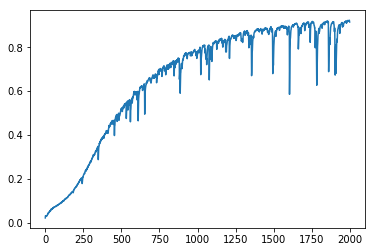

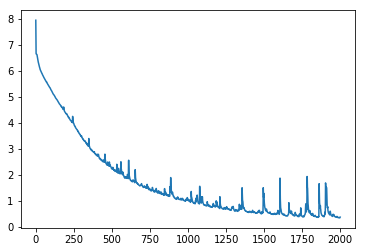

<Figure size 432x288 with 0 Axes>

In [15]:
import matplotlib.pyplot as plt

acc = history.history["acc"]
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc)
plt.figure()

plt.plot(epochs, loss)
plt.figure()

In [21]:
seed_text = "I am happy"
next_word = 50

for _ in range(next_word):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_len_sequence - 1, padding = 'pre')
    predicted = model.predict_classes(token_list)
    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed_text = seed_text + " " + output_word
    
print(seed_text)

I am happy a party yeah so hope i slept like a my other more more quot sadly fun that but in mel's morning cause i take in going from working tomorrow work so quite about me tonight for drinking me half 4 just my arnie ezlo overkill internet internet playing active too
